<a href="https://colab.research.google.com/github/hirva-p/Bitcoin_Network_Analysis/blob/main/Data_Science_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing Libraries
import pandas as pd
import networkx as nx
from networkx.algorithms.community import girvan_newman
from sklearn.cluster import SpectralClustering
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import csv
from scipy.sparse.linalg import svds
from scipy.linalg import sqrtm
from scipy.sparse.linalg import eigs

In [2]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv("/content/data_science_project.csv")

# Construct the graph
G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='Rating', create_using=nx.DiGraph())

# Print the total number of nodes and edges in the graph
total_nodes = G.number_of_nodes()
total_edges = G.number_of_edges()
print("Total number of nodes in the graph:", total_nodes)
print("Total number of edges:", total_edges)

# Definition of in-nodes and out-nodes:
# In-nodes: Nodes that have at least one incoming edge.
# Out-nodes: Nodes that have at least one outgoing edge.

# Calculate the number of in-nodes and out-nodes
in_nodes = len([n for n in G.nodes() if G.in_degree(n) > 0])
out_nodes = len([n for n in G.nodes() if G.out_degree(n) > 0])
print("Number of in-nodes:", in_nodes)
print("Number of out-nodes:", out_nodes)

print('\n *****For Strongly Connected Graphs***** \n')
# Find the strongly connected components
strongly_connected_components = list(nx.strongly_connected_components(G))

# Find the largest strongly connected component
largest_scc = max(strongly_connected_components, key=len)

print("Total number of nodes:", len(largest_scc))
scc_edges = [(source, target) for source, target in G.edges() if source in largest_scc and target in largest_scc]
total_scc_edges = len(scc_edges)
print("Total number of edges :", total_scc_edges)
print("Number of in-nodes:", len(largest_scc))    #Will be equal as it is strongly connected and hence will have atleast one in-node and one out node
print("Number of out-nodes:",len(largest_scc))



Total number of nodes in the graph: 3783
Total number of edges: 24186
Number of in-nodes: 3754
Number of out-nodes: 3286

 *****For Strongly Connected Graphs***** 

Total number of nodes: 3235
Total number of edges : 23299
Number of in-nodes: 3235
Number of out-nodes: 3235


In [3]:
print('\n *****Max nodes that can be tranversed from a randomly selected node***** \n')

nodes_list = list(G.nodes())
random_nodes = random.sample(nodes_list, k=10)
reachable_nodes_count = {}

for node in random_nodes:
    reachable_nodes = nx.bfs_tree(G, source=node).nodes()
    reachable_nodes_count[node] = len(reachable_nodes)

# Print the information
for node, count in reachable_nodes_count.items():
  print(f"Starting from node {node} : , {count} nodes can be reached.")


 *****Max nodes that can be tranversed from a randomly selected node***** 

Starting from node 1873 : , 3748 nodes can be reached.
Starting from node 2351 : , 3748 nodes can be reached.
Starting from node 444 : , 3748 nodes can be reached.
Starting from node 1354 : , 3748 nodes can be reached.
Starting from node 3300 : , 3748 nodes can be reached.
Starting from node 3434 : , 1 nodes can be reached.
Starting from node 1191 : , 3748 nodes can be reached.
Starting from node 595 : , 3748 nodes can be reached.
Starting from node 768 : , 3748 nodes can be reached.
Starting from node 202 : , 3748 nodes can be reached.



 *****Girvan-Newman Algorithm***** 



/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


Community 1 
	Number of Nodes 3764 
	Number of Edges 24158 
	Community:{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 2

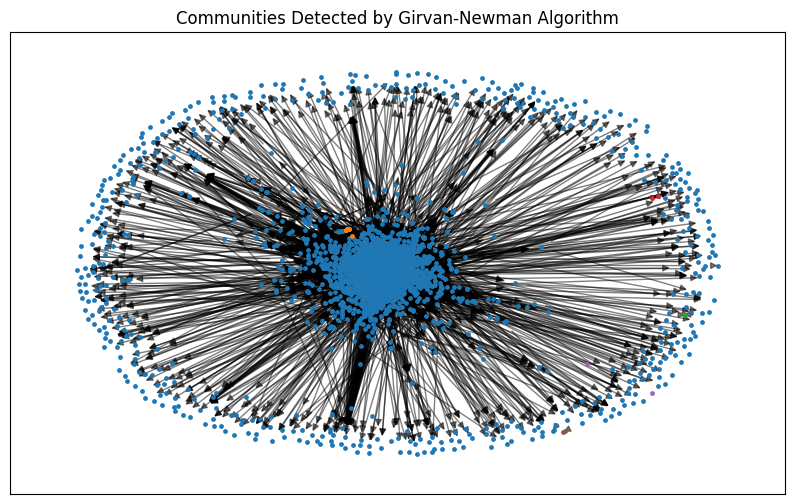

In [4]:
print('\n *****Girvan-Newman Algorithm***** \n')

# Apply the Girvan–Newman algorithm to detect communities
communities_generator = girvan_newman(G)

# Get the first partition of communities (you can adjust this based on your criteria)
communities_girvan = next(communities_generator)

#Plotting the communities
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
cmap = plt.get_cmap("tab10")
for i, community_nodes in enumerate(communities_girvan):
    nx.draw_networkx_nodes(G, pos, nodelist=community_nodes, node_color=cmap(i), label=f"Community {i}", node_size=6)
    subgraph = G.subgraph(community_nodes)
    num_edges = subgraph.number_of_edges()
    print(f"Community {i+1}", '\n\tNumber of Nodes',len(community_nodes),'\n\tNumber of Edges',num_edges, f'\n\tCommunity:{community_nodes} ')

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Communities Detected by Girvan-Newman Algorithm")
plt.show()

In [7]:
print('\n *****Spectral Clustering***** \n')

# Create the adjacency matrix
A = nx.to_numpy_array(G)

# Compute the degree matrix
D = np.diag(np.sum(A, axis=1))

# Compute the random walk normalized Laplacian matrix
D_sqrt = sqrtm(D)
D_inv_sqrt = np.linalg.pinv(D_sqrt)
L = np.eye(A.shape[0]) - D_inv_sqrt @ A @ D_inv_sqrt.T

# Compute the eigenvalues and eigenvectors using ARPACK
k = 30
L = np.real(L)




 *****Spectral Clustering***** 



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nodes in each cluster:
Cluster 0: 3759 nodes
Its Nodes: [7188, 1, 430, 3134, 3026, 3010, 804, 160, 95, 377, 888, 89, 1901, 161, 256, 351, 3329, 3341, 649, 1583, 87, 37, 309, 821, 1496, 637, 964, 594, 2249, 554, 20, 2227, 1315, 519, 1316, 2149, 1724, 18, 57, 118, 3254, 1177, 112, 11, 586, 35, 15, 1445, 152, 2, 113, 44, 2401, 10, 2378, 126, 3245, 783, 493, 1358, 1180, 529, 333, 1538, 2282, 1519, 2966, 474, 330, 958, 17, 1295, 38, 1952, 223, 625, 1392, 3355, 1881, 58, 96, 1580, 196, 146, 416, 1198, 3319, 1867, 896, 617, 3300, 1877, 462, 3279, 454, 1860, 121, 151, 1570, 1573, 1063, 1353, 459, 2334, 1267, 1060, 1061, 7431, 1355, 71, 3070, 2113, 3001, 396, 2260, 142, 2238, 123, 2942, 1509, 7410, 1760, 2876, 259, 1493, 2845, 370, 2844, 2167, 156, 2808, 255, 736, 7603, 346, 9, 75, 175, 2754, 22, 155, 1261, 2552, 2586, 710, 578, 472, 2472, 1606, 4, 563, 744, 3422, 250, 249, 2427, 3414, 1590, 2305, 1900, 3392, 1065, 1147, 1072, 3375, 1024, 709, 1382, 3332, 1885, 3330, 1197, 3316, 1886, 154, 1522

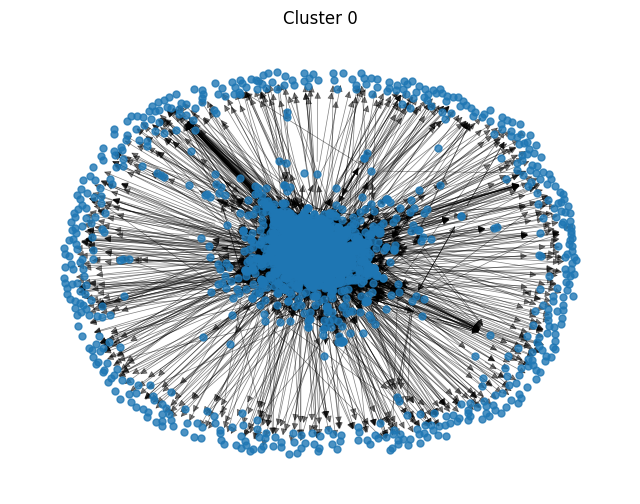

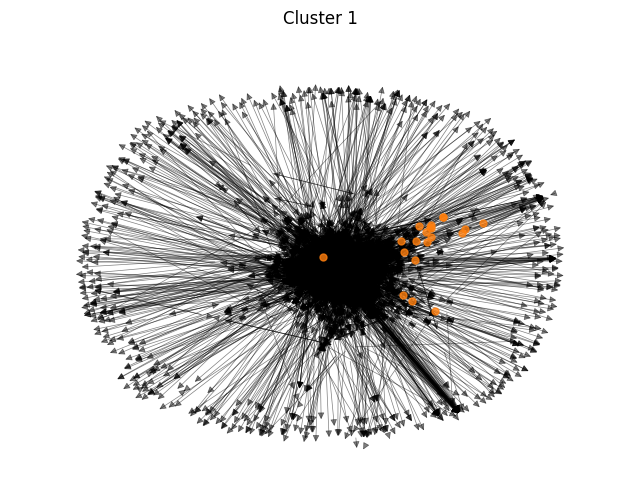

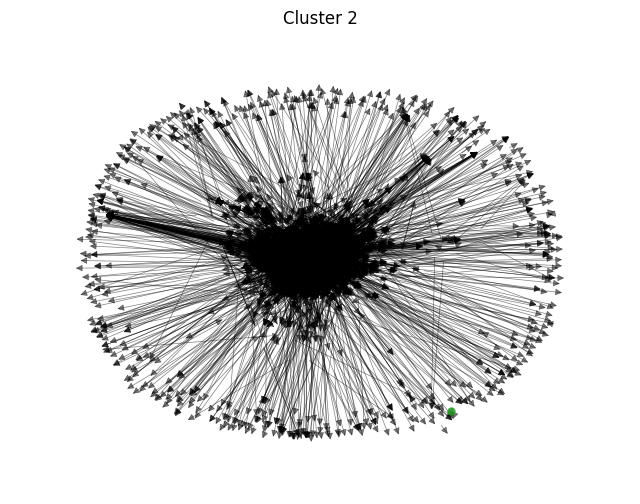

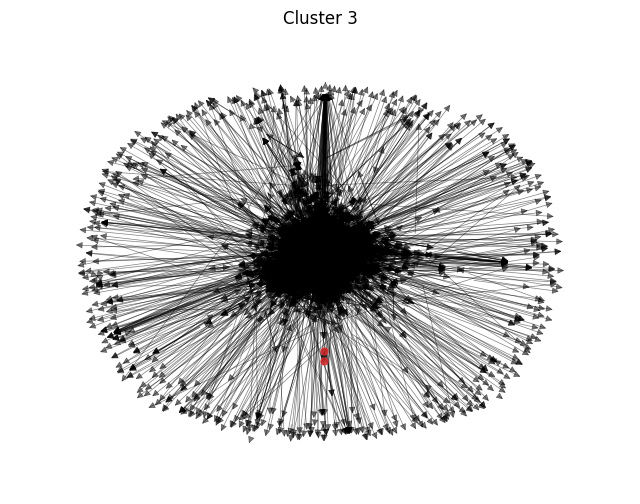

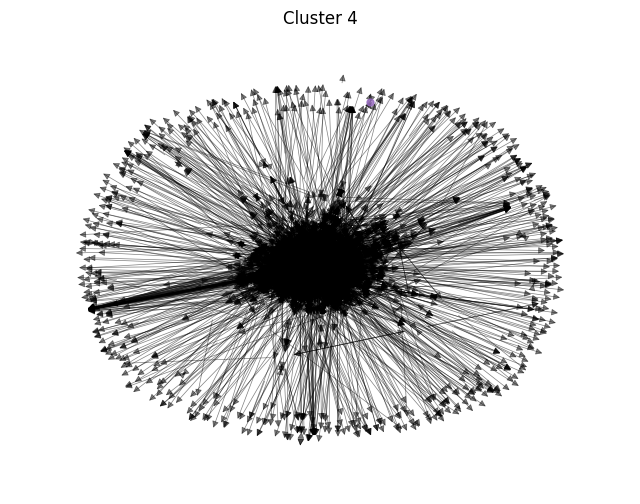

In [8]:
u, sigma, vt = svds(L, k=k, return_singular_vectors='u')

# Sort the eigenvalues (sigma) and eigenvectors (u) in ascending order
idx = sigma.argsort()
sigma = sigma[idx]
u = u[:, idx]

# Select the top k eigenvectors (excluding the constant eigenvector)
X = u[:, 1:k + 1]

# Apply KMeans clustering
n_clusters = 5  # Choose the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(X)

# Group nodes by cluster
cluster_nodes = [[] for _ in range(n_clusters)]
for i, node in enumerate(G.nodes()):
    cluster_nodes[labels[i]].append(node)

# Print nodes of each cluster together
print("Nodes in each cluster:")
for i, nodes in enumerate(cluster_nodes):
    print(f"Cluster {i}: {len(nodes)} nodes")
    print(f"Its Nodes: {nodes}")

# Plot nodes of each cluster
for i, nodes in enumerate(cluster_nodes):
    pos = nx.spring_layout(G)  # Layout for plotting
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=f'C{i}', node_size=25, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
    plt.title(f'Cluster {i}')
    plt.axis('off')
    plt.show()


 *****Plotting the EigenValues***** 



/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


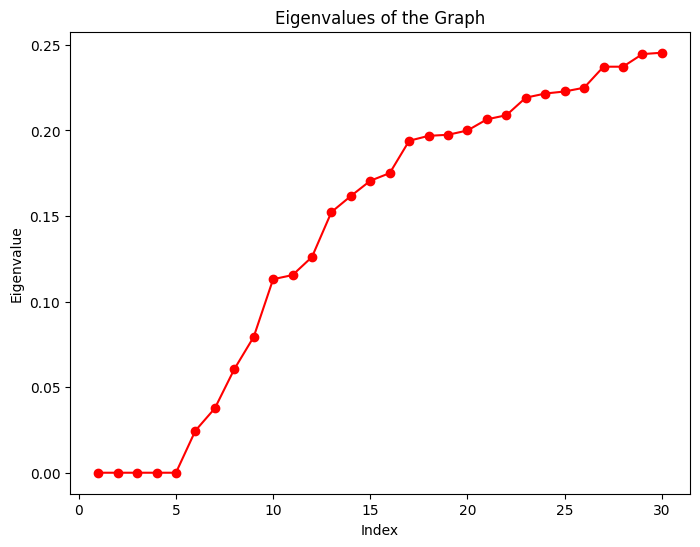

0  :  (-1.3713919375356099e-16+0j)
1  :  (4.561547854251634e-17+0j)
2  :  (1.2660721549208543e-16+0j)
3  :  (3.649216444372637e-16+0j)
4  :  (5.059733186860611e-16+0j)
5  :  (0.024571545642415087+0j)
6  :  (0.037626223461819125+0j)
7  :  (0.06046614344872924+0j)
8  :  (0.07935989826180763+0j)
9  :  (0.11308838102750014+0j)
10  :  (0.11551177763268454+0j)
11  :  (0.12610211098184865+0j)
12  :  (0.15233310081491525+0j)
13  :  (0.16169779703050974+0j)
14  :  (0.17061786875224655+0j)
15  :  (0.1750949181622309+0j)
16  :  (0.19399031015559282+0j)
17  :  (0.19686632563735712+0j)
18  :  (0.1974921022507767+0j)
19  :  (0.2000081984460413+0j)
20  :  (0.20651620603507162+0j)
21  :  (0.2089189123211475+0j)
22  :  (0.2191741957507825+0j)
23  :  (0.22158975484524351+0j)
24  :  (0.22279523366968615+0j)
25  :  (0.22499244219694575+0j)
26  :  (0.23727444003997122-0.00039153438428939243j)
27  :  (0.23727444003997122+0.00039153438428939243j)
28  :  (0.24464293760303188+0j)
29  :  (0.24544155868688858+0j

In [6]:
print('\n *****Plotting the EigenValues***** \n')

eigenvalues, eigenvectors = eigs(L, k=k, which='SM')

# Sort the eigenvalues and eigenvectors in ascending order
idx = eigenvalues.argsort()
eigenvalues = eigenvalues[idx]

# Plot the eigenvalues
plt.figure(figsize=(8, 6))
plt.plot(range(1, k+1), eigenvalues, 'ro-')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the Graph')
plt.show()

for i in range(k):
  print(i,' : ',eigenvalues[i])